<a href="https://colab.research.google.com/github/coldjoke123/python1/blob/master/HW_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


## 載入資料並且重新調整資料的樣子

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

11493376/11490434 [==============================] - 1s 0us/step


## 將老師上課的模型匯入

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [7]:
model_old = Sequential()
model_old.add(Dense(4, input_dim = 784))
model_old.add(Activation('sigmoid'))
model_old.add(Dense(2))
model_old.add(Activation('sigmoid'))
model_old.add(Dense(10))
model_old.add(Activation('softmax'))
model_old.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_old.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
__

In [8]:
model_old_20 = model_old.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=20,
                         verbose=1,
                         validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0910 - acc: 0.0961 - val_loss: 0.0905 - val_acc: 0.1048
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0903 - acc: 0.1045 - val_loss: 0.0901 - val_acc: 0.1130
Epoch 3/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0901 - acc: 0.1089 - val_loss: 0.0899 - val_acc: 0.1152
Epoch 4/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0899 - acc: 0.1131 - val_loss: 0.0898 - val_acc: 0.1197
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0897 - acc: 0.1176 - val_loss: 0.0896 - val_acc: 0.1221
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0896 - acc: 0.1204 - val_loss: 0.0895 - val_acc: 0.1246
Epoch 7/20
60000/60000 [==============================] - 1s 19us/step - loss: 0

## 對資料做正規化，將資料調整至 $[0,1]$ 區間

降低資料受到極值的影響

In [0]:
x_train_reg = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test_reg = (x_test - x_test.min())/(x_test.max() - x_test.min())

## 首先，我們增加神經元的個數至每層100個，其餘參數不變

In [10]:
model_test1 = Sequential()
model_test1.add(Dense(100, input_dim = 784))
model_test1.add(Activation('sigmoid'))
model_test1.add(Dense(100))
model_test1.add(Activation('sigmoid'))
model_test1.add(Dense(10))
model_test1.add(Activation('softmax'))
model_test1.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
model_test1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_test1_20 = model_test1.fit(x_train_reg, y_train, 
                         batch_size=100, 
                         epochs=20,
                         verbose=1,
                         validation_data=(x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0908 - acc: 0.1183 - val_loss: 0.0898 - val_acc: 0.1163
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0897 - acc: 0.1158 - val_loss: 0.0895 - val_acc: 0.1163
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0895 - acc: 0.1204 - val_loss: 0.0893 - val_acc: 0.1166
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0893 - acc: 0.1221 - val_loss: 0.0891 - val_acc: 0.1448
Epoch 5/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0891 - acc: 0.1357 - val_loss: 0.0889 - val_acc: 0.2282
Epoch 6/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0888 - acc: 0.1897 - val_loss: 0.0887 - val_acc: 0.1703
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0886 - acc: 0.1856 - val_loss: 0.0884 - val_acc

In [12]:
score = model_test1.evaluate(x_test_reg, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 0s 32us/step
loss: 0.07663173376321793
accuracy: 0.4584


## 相較於老師上課的模型，可以發現增加神經元數是能增加準確率的！

## 於是，在Hidden layer有兩層activation function是sigmoid，loss function是mse，optimizer是SGD的條件下，測試神經元的個數以50個為單位從100到800來尋找準確率最高的組合。

In [0]:
def seek_opt(n):
    seek_accu = np.zeros((2*(n-1),n-1))
    for i in range(1,n):
        for j in range(1,n):
            model = Sequential()
            model.add(Dense(50*(i+1), input_dim = 784))
            model.add(Activation('sigmoid'))
            model.add(Dense(50*(j+1)))
            model.add(Activation('sigmoid'))
            model.add(Dense(10))
            model.add(Activation('softmax'))
            model.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])
            score = model.evaluate(x_test_reg, y_test)
            seek_accu[i-1,j-1] = score[1]
            seek_accu[i-1+(n-1),j-1] = score[0]
    return seek_accu

In [14]:
seek_accu = seek_opt(16)
accu = seek_accu[:16,:]
loss = seek_accu[16:,:]

10000/10000 [==============================] - 4s 415us/step


In [0]:
opt_acc_value = accu.max()
opt_acc_index = accu.argmax()

model_best = Sequential()
model_best.add(Dense(50*((opt_acc_index//15)+2), input_dim = 784))
model_best.add(Activation('sigmoid'))
model_best.add(Dense(50*((opt_acc_index%15)+2)))
model_best.add(Activation('sigmoid'))
model_best.add(Dense(10))
model_best.add(Activation('softmax'))
model_best.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])

In [16]:
model_best_20 = model_best.fit(x_train_reg, y_train,
                         batch_size = 100,
                         epochs = 20,
                         verbose = 1,
                         validation_data = (x_test_reg, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0901 - acc: 0.1229 - val_loss: 0.0896 - val_acc: 0.1147
Epoch 2/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0894 - acc: 0.1574 - val_loss: 0.0891 - val_acc: 0.1234
Epoch 3/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0889 - acc: 0.1943 - val_loss: 0.0887 - val_acc: 0.1836
Epoch 4/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0885 - acc: 0.2346 - val_loss: 0.0881 - val_acc: 0.2734
Epoch 5/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0879 - acc: 0.2734 - val_loss: 0.0876 - val_acc: 0.2883
Epoch 6/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0873 - acc: 0.2867 - val_loss: 0.0869 - val_acc: 0.2890
Epoch 7/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0865 - acc: 0.2939 - val_loss: 0.0860 

## 由以上結果可知，在兩層hidden layer下，神經元個數分別為 跟 會有最高的準確率！

## 比較新的模型與老師上課的模型

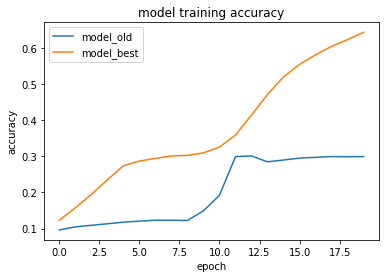

In [17]:
plt.plot(model_old_20.history["acc"])
plt.plot(model_best_20.history["acc"])
         
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_old","model_best"], loc = 'best')
plt.show()

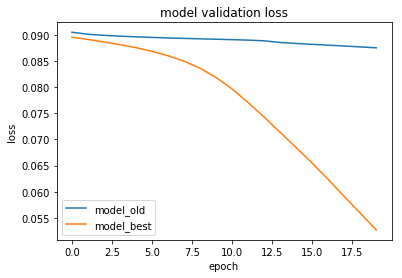

In [18]:
plt.plot(model_old_20.history["val_loss"])
plt.plot(model_best_20.history["val_loss"])
         
plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["model_old","model_best"], loc = 'best')
plt.show()

# 在這個參數的基礎下去選擇不同的loss function 與activation function做測試